In [ ]:
#Logistic Regression and One versus One
#his dataset simulates a financial context, designed to reflect customer account behavioracross various risk classes within a banking or financial institution. 
#It comprises featuressuch as Age of Account (in years), Number of Transactions in the last month, AverageTransaction Value, Credit Score, and Account Balance, for a total of 700 entries. Eachrecord is then categorized into one of three risk classes (Low, Medium, High)
#3. Your goal is to design an ML classifier using OVO with logistic regression.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('synthetic_FINANCE.csv')
data

,Unnamed: 0,Age_of_Account_years,Number_of_Transactions_last_month,Average_Transaction_Value,Credit_Score,Account_Balance,Risk_Class
0,0,7,12,5577.48,383,3804.62,0
1,1,20,55,8607.71,751,11394.94,2
2,2,29,13,5355.35,684,36539.28,1
3,3,15,23,1852.78,471,29980.53,0
4,4,11,89,3002.96,675,3318.11,2
...,...,...,...,...,...,...,...
695,695,17,49,1854.01,564,13644.79,1
696,696,7,71,2959.83,619,6355.29,2
697,697,24,81,7936.14,675,16914.54,2
698,698,23,84,1860.43,388,49977.24,2


In [15]:
X = data[['Number_of_Transactions_last_month', 'Average_Transaction_Value', 'Credit_Score']]
y = data['Risk_Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [17]:
logistic_regression_model = LogisticRegression()
ovo_classifier = OneVsOneClassifier(logistic_regression_model)

In [18]:
ovo_classifier.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [19]:
y_pred = ovo_classifier.predict(X_test)

In [20]:
#Calculating the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [21]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5285714285714286
Precision: 0.49845540786388476
Recall: 0.4816339180561582


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        73
           1       0.42      0.15      0.23        52
           2       0.55      0.73      0.63        85

    accuracy                           0.53       210
   macro avg       0.50      0.48      0.46       210
weighted avg       0.51      0.53      0.50       210



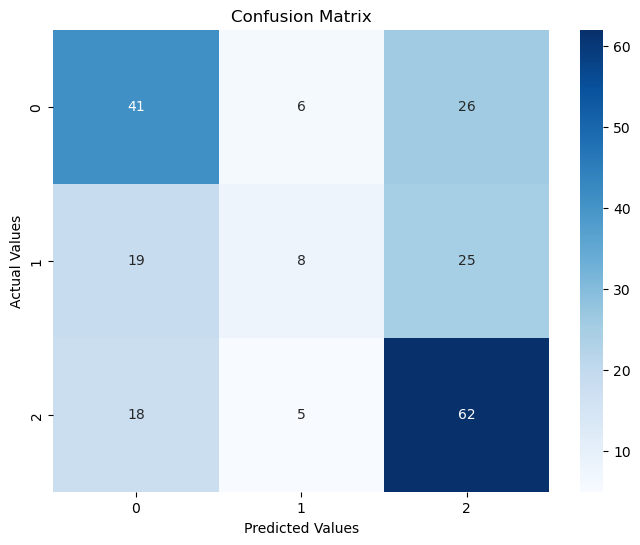

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [25]:
Number_of_Transactions_last_month = int(input("Enter the number of transactions in last month: "))
Average_Transaction_Value = float(input("Enter the average transaction value: "))
Account_Balance = int(input("Enter the credit score: "))
input_data = [[Number_of_Transactions_last_month, Average_Transaction_Value, Account_Balance]]
outcome = ovo_classifier.predict(input_data)
print(f"Predicted risks:{outcome}")

Enter the number of transactions in last month: 56
Enter the average transaction value: 6785.67
Enter the credit score: 475
Predicted risks:[2]


In [ ]:
#From my point of view Precision looks very important for this analysis, because  False positives may occur when we predicts an account as risky when it's actually not risky. 
#In the live industries, false positives can lead to unnecessary problems like customer dissatisfaction, and may broke the trust due to incorrectly predicting the risk. 
#So here the high precision indicates that the model is accurately identifying risky accounts.

#Evaluating the result:

#Precision
#Classificiation 0 has the highest precision of 53% , hence the accounts correctly predicted as 0.
#Classificiation 2 has the precision of 55%, hence the accounts correctly predicted as 2.
#Classification 1 has the lowest precision of 42%, hence only this percentage of the accounts are correctly predicted as 1.

#Recall
#Classification 2 has the highest recall of 73% of 2 accounts.
#Classification 0 has the recall of 56% of 0 accounts.
#Classification 1 has the lowest recall of 85% of 1 accounts.

#F1-score
#Classification 2 has the highest F1-score of 63%, which represents a balance between precision and recall for  2.
#Classification 0 has the F1-score of 54%, indicating a good balance between precision and recall for  0.
#Classification 1 has the lowest F1-score of 23%, indicating a poor balance between precision and recall for  1.


#Classification 0 and Class 2 prediction shows that a balanced performance between precision, recall, and F1-score.
#Classification 1 has lower precision, recall, and F1-score compared to the other classes, so our model performance accuracy is less for Class 1 compared to the other classes.
